In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('問卷data4.csv',  encoding='utf-8-sig')
data

,食物的新鮮程度 Freshness of the food,合理價格 Fair price (價格昂貴程度),提供餐點正確 Serve food as ordered,用餐環境整潔 Cleanliness of the dining room,餐廳接受與否
0,4,5,4,4,接受
1,3,4,3,1,接受
2,3,3,3,3,接受
3,5,4,5,4,接受
4,4,5,5,5,接受
...,...,...,...,...,...
669,4,3,4,3,不接受
670,4,4,4,4,不接受
671,3,3,4,3,不接受
672,4,3,3,3,不接受


In [ ]:
features = list(data.columns[:4])
X = data[features]
y = data["餐廳接受與否"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

[Text(0.49537037037037035, 0.9583333333333334, 'X[0] <= 4.5\ngini = 0.5\nsamples = 539\nvalue = [275, 264]'),
 Text(0.4583333333333333, 0.875, 'X[1] <= 4.5\ngini = 0.334\nsamples = 349\nvalue = [275, 74]'),
 Text(0.4212962962962963, 0.7916666666666666, 'X[2] <= 4.5\ngini = 0.213\nsamples = 313\nvalue = [275, 38]'),
 Text(0.38425925925925924, 0.7083333333333334, 'X[3] <= 4.5\ngini = 0.153\nsamples = 300\nvalue = [275, 25]'),
 Text(0.3472222222222222, 0.625, 'X[3] <= 1.5\ngini = 0.132\nsamples = 296\nvalue = [275, 21]'),
 Text(0.14814814814814814, 0.5416666666666666, 'X[2] <= 2.5\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.1111111111111111, 0.4583333333333333, 'X[1] <= 1.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.07407407407407407, 0.375, 'X[0] <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.037037037037037035, 0.2916666666666667, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.1111111111111111, 0.2916666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0

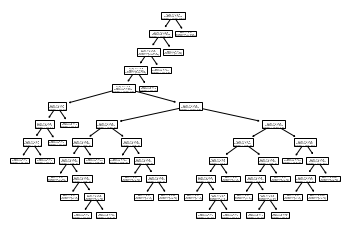

In [ ]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)
tree.plot_tree(model.fit(X_train, y_train))

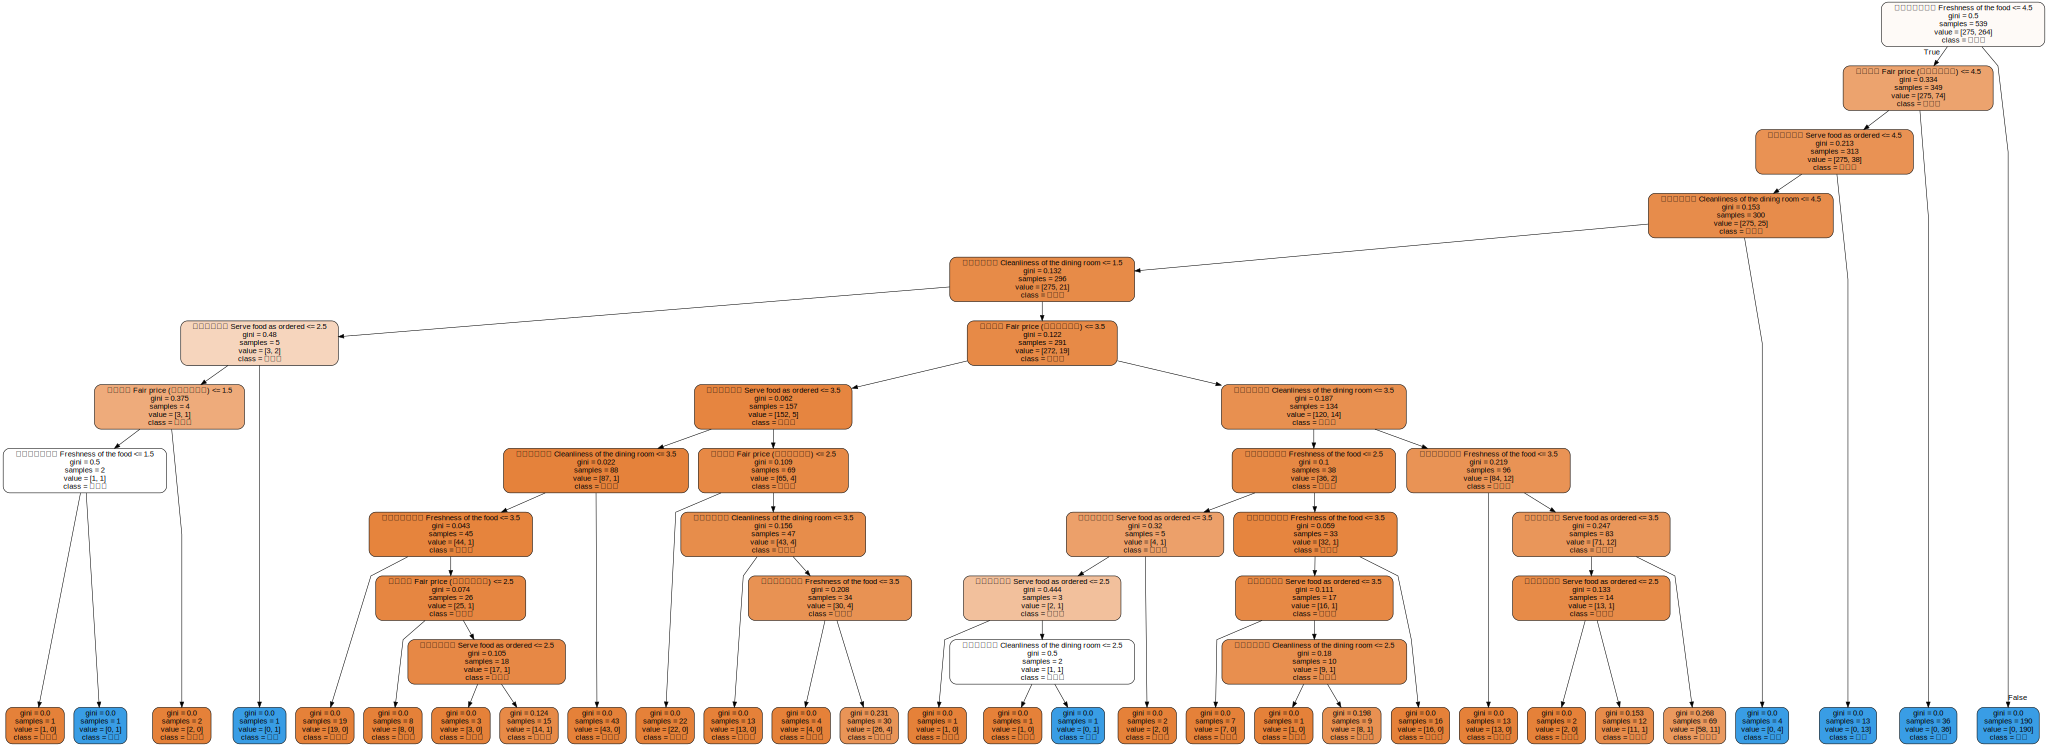

In [ ]:
import graphviz

dot_data = tree.export_graphviz(model, out_file=None,
                     feature_names=features,
                     class_names=["不接受", "接受"],
                     filled=True, rounded=True, leaves_parallel=True)

graph = graphviz.Source(dot_data)
graph


In [ ]:
d = {'feature': features, 'importance': model.feature_importances_}
pd.DataFrame(data=d).sort_values(by=['importance'], ascending=False)

,feature,importance
0,食物的新鮮程度 Freshness of the food,0.648697
1,合理價格 Fair price (價格昂貴程度),0.215359
2,提供餐點正確 Serve food as ordered,0.096092
3,用餐環境整潔 Cleanliness of the dining room,0.039851


In [ ]:
from sklearn.metrics import accuracy_score
y_predict = model.predict(X_test)
accuracy_score(y_test, y_predict)

0.9407407407407408

In [ ]:
from sklearn import metrics
mycm = metrics.confusion_matrix(y_test,y_predict)
print('Confusion Matrix: \n',mycm)

Confusion Matrix: 
 [[61  1]
 [ 7 66]]
